# Multiclass classification

## Imports & dataset loading

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import seaborn as sns

In [4]:
import matplotlib
import matplotlib.pyplot as plt


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [37]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [8]:
import joblib

In [9]:
# load the training dataset
# if necessary download the file
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
dataset = pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data split

In [11]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Separate features and labels
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
label = 'quality'
X, y = dataset[features].values, dataset[label].values

for n in range(0,4):
    print("Row", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Row 1 
  Features: [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4] 
  Label: 5
Row 2 
  Features: [7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8] 
  Label: 5
Row 3 
  Features: [7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8] 
  Label: 5
Row 4 
  Features: [11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8] 
  Label: 6


In [13]:
#sns.pairplot(dataset, hue='quality')

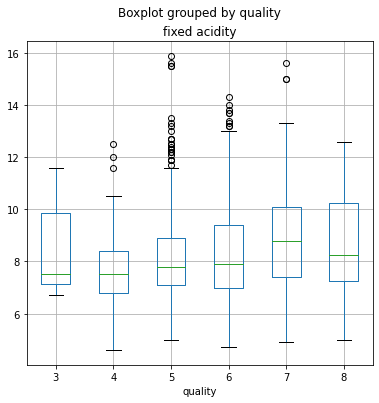

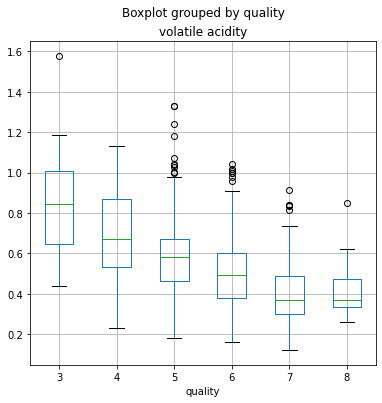

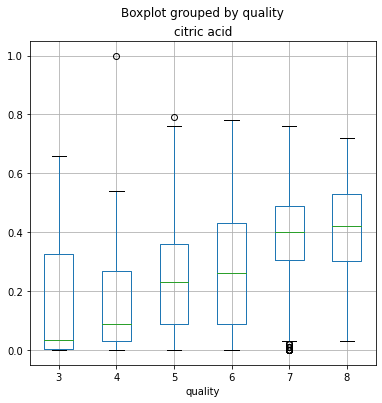

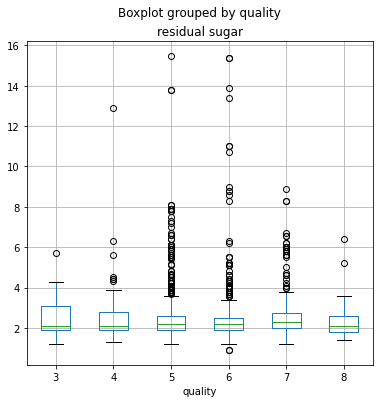

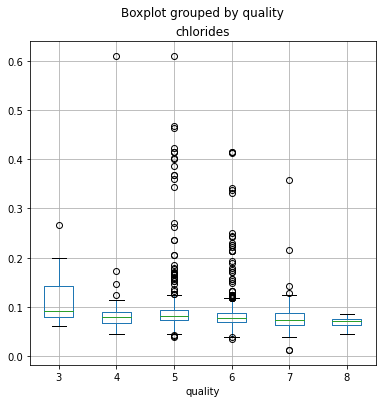

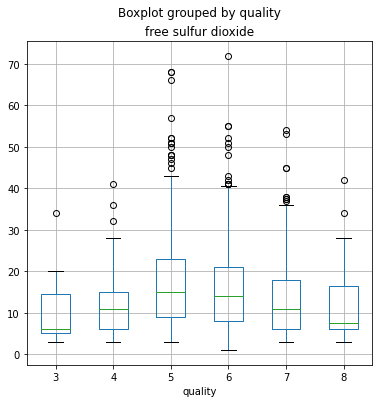

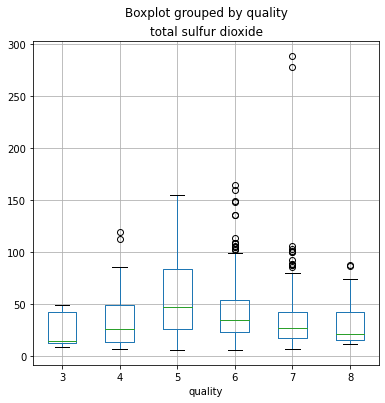

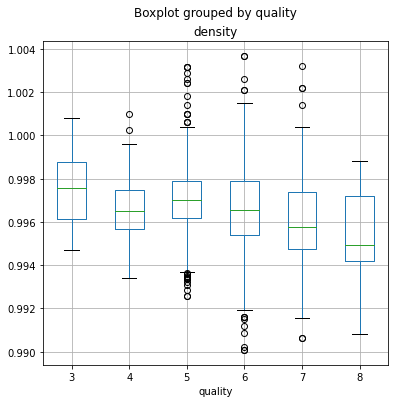

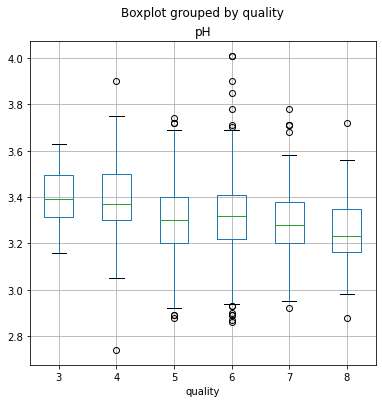

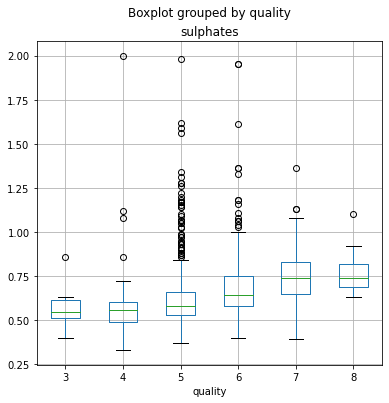

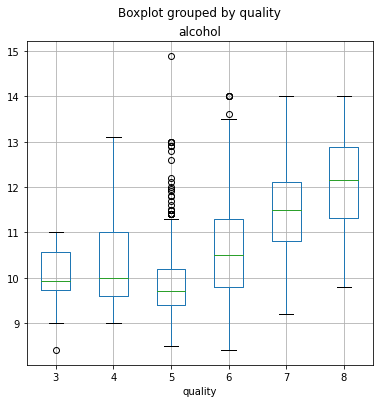

In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for col in features:
    dataset.boxplot(column=col, by='quality', figsize=(6,6))
    plt.title(col)
plt.show()

In [15]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 1119
Test cases: 480


## Data preprocessing & training

<span style="color:red">**!!! Insert here data preparation as necessary !!!**</span>

In [16]:
print(dataset.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [17]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6,7,8,9,10]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



## Train Logistic Regression

In [18]:
# Set regularization rate
reg = 0.01

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(multi_class = 'auto', C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


## Train RandomForest Classification

In [38]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


## Evaluate

In [33]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
print('Predicted labels: ', predictions_test)
print('Actual labels:    ' ,y_test)

Predicted labels:  [6 5 7 5 6 5 5 6 5 5 5 5 6 5 6 6 7 6 6 5 6 5 6 7 5 5 5 6 5 7 6 6 6 5 6 6 5
 6 6 6 5 6 7 7 6 5 5 6 5 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 5 5 6 6 5 5 7 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 5 5 5 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 6 5 5 6 6 5 5 6 6 7 5 6 5 6 5 6 5 5 5 6 6 6 7
 6 5 6 6 5 6 6 6 5 5 6 6 6 6 6 5 6 5 6 7 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 5 5 6 5 6 6 6 6 5 5 6
 6 6 5 6 6 6 5 5 5 6 5 6 6 6 6 7 6 6 5 5 5 5 6 5 5 5 5 7 5 5 5 5 6 5 5 5 5
 5 5 7 5 6 5 5 5 5 6 6 5 6 5 7 6 6 6 5 7 6 5 7 6 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 6 5 5 5 7 6 6 5 6 5 5 6 6 5 5 7 5 5 5 7 5 5
 6 5 6 6 6 5 5 5 5 5 6 6 5 5 5 5 7 6 6 5 6 7 5 6 6 6 6 5 7 5 6 5 5 6 6 5 5
 5 6 5 6 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 7 5 5 6 5 6 5 5 6 5 5 5 5 5 5 5 6
 6 5 6 6 5 5 6 6 5 6 5 5 6 6 6 6 6 5 6 6 6 5 5 5 6 5 6 6 7 6 7 5 5 6 5 6 5
 6 5 6 7 5 6 6 5 6 7 6 5 5 5 6 5 5 7 5 5 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5]
Actual 

In [20]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.6270833333333333


In [34]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.68      0.79      0.73       208
           6       0.61      0.61      0.61       204
           7       0.34      0.27      0.30        45
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.27      0.28      0.27       480
weighted avg       0.59      0.63      0.60       480



/home/utilisateur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/utilisateur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/utilisateur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
scores = cross_val_score(model, X_train, y_train)
print("Cross-validated score : {}\nStd : {}".format(scores.mean(), scores.std()))

Cross-validated score : 0.5719250480461243
Std : 0.02053561007154215


In [22]:
print("Overall Precision:",precision_score(y_test, predictions_test))
print("Overall Recall:",recall_score(y_test, predictions_test))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [35]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions_test)
print (cm)

[[  0   0   3   0   0   0]
 [  0   0  10   3   2   0]
 [  0   0 165  42   1   0]
 [  0   0  62 124  18   0]
 [  0   0   3  30  12   0]
 [  0   0   0   3   2   0]]


In [40]:
# Visualize confusion matrices
# More readable in this case : use normalized version of the confusion_matrix
from plotly.subplots import make_subplots
cm_train = confusion_matrix(y_train, predictions_train, normalize = "true")
cm_test = confusion_matrix(y_test, predictions_test, normalize = "true")

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("train", "test"), 
                    x_title = 'Prediction', y_title = 'True label')
fig.update_layout(
        title = go.layout.Title(text = "Confusion matrices", x = 0.5))
fig.update_yaxes(autorange='reversed')
fig.add_trace(
    go.Heatmap(
        name = 'train',
        x = ['3', '4', '5', '6', '7', '8'], # put here the class labels
        y = ['3', '4', '5', '6', '7', '8'], 
        z = cm_train,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 1
)  
fig.add_trace(
    go.Heatmap(
        name = 'test',
        x = ['3', '4', '5', '6', '7', '8'], 
        y = ['3', '4', '5', '6', '7', '8'], 
        z = cm_test,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 2
)

In [25]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[4.80796772e-04 1.31550107e-02 3.75230298e-01 5.14794758e-01
  9.60321790e-02 3.06957657e-04]
 [3.24532047e-02 9.34463768e-02 5.48401518e-01 3.17522525e-01
  8.10352266e-03 7.28528643e-05]
 [1.40573623e-05 6.08563424e-03 3.86572099e-02 4.42826329e-01
  4.91547526e-01 2.08692440e-02]
 ...
 [2.89393824e-05 1.54212114e-02 7.14800555e-01 2.60857223e-01
  8.39263472e-03 4.99435848e-04]
 [1.99946410e-03 5.43101467e-02 3.94688728e-01 4.96553023e-01
  4.99531138e-02 2.49552421e-03]
 [2.86967784e-05 1.67100984e-02 6.87935852e-01 2.77329642e-01
  1.77548345e-02 2.40876940e-04]]


In [43]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance

(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

In [45]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance,  index=["Chi2 Score", "P-value"])
#.transpose().sort_values("Chi2 Score")
#feature_ranking = feature_ranking.reset_index().rename({'index': 'feature'}, axis = 1)
feature_ranking

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [27]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

ValueError: multi_class must be in ('ovo', 'ovr')

## Save model

In [47]:
# Save the model as a pickle file
filename = './model.pkl'
joblib.dump(model, filename)

['./model.pkl']

## Load model

In [48]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1
